In [1]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 19.6 MB/s eta 0:00:00


In [2]:
import SimpleITK as sitk

image = sitk.ReadImage("/content/MRHead.nii")

#Origin, Dimension, Pixel Type, Spacing, Size, Direction

print("Image Origin : ", image.GetOrigin()) #RPS에 위치
print("Image Dimension : ", image.GetDimension()) #3D 데이터임

print("Image Spacing : ", image.GetSpacing())
#X 방향 (1.0mm): 좌우 방향(Left-Right) 픽셀 간격. = sagittal
#Y 방향 (1.0mm): 앞뒤 방향(Anterior-Posterior) 픽셀 간격. = coronal
#Z 방향 (1.3mm): 위아래 방향(Superior-Inferior), 즉 슬라이스 간의 간격(슬라이스 두께). = axial
print("Direction Matrix : ", image.GetDirection()) # 3X3 행렬
print("Pixel Type : ", image.GetPixelIDTypeAsString())
print("Image Size : ", image.GetSize())



RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:91:
sitk::ERROR: The file "/content/MRHead.nii" does not exist.

In [42]:
print(image.GetPixel(0,0,0))
image.SetPixel(0,0,0,128)
print(image.GetPixel(0,0,0)

0
128


In [43]:
image_array = sitk.GetArrayFromImage(image) #simpleITK 이미지 객체를 넘파이 배열로 반환
print("image size :", image.GetSize())
print("array size :", image_array.shape)
#넘파이 배열의 축 순서는 simpleITK 축 순서랑 다름

#(256,256,130)이 각각 axial, coronal, sagittal이 맞는지
#(130,256,256)이 각각 sagittal, axial, coronal이 맞는지

image size : (256, 256, 130)
array size : (130, 256, 256)


<class 'numpy.ndarray'>
<class 'SimpleITK.SimpleITK.Image'>


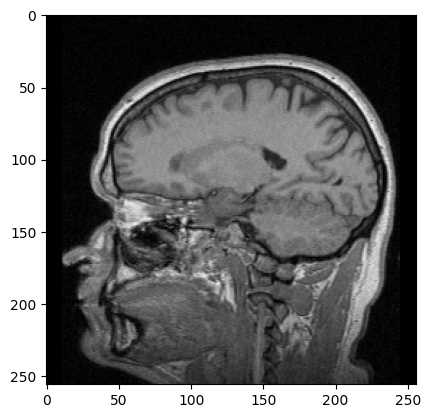

In [45]:
import matplotlib.pyplot as plt
print(type(image_array))
plt.imshow(image_array[80,:,:],cmap='gray')
#[sagittal,axial,coronal]

print(type(image))
#plt.imshow(image[:,:,50], cmap='gray')
#[coronal,axial,sagittal]
#type이 SimpleITK면 직접 슬라이싱 못함. 따라서 넘파이 배열로 반환해줘야 함



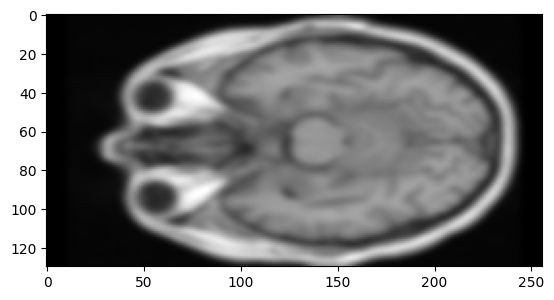

In [29]:
#basic image filter
smoothed_image = sitk.SmoothingRecursiveGaussian(image, sigma=2) #adapt a filter named Gaussian Smoothing
#convert the smoothed image to a numpy arrat fot visualization
smoothed_image_array = sitk.GetArrayFromImage(smoothed_image)
#SimpleITK 객체는 직접적으로 시각화할 수 없으므로 numpy 배열로 변환하여 matplotlib 같은 시각화 라이브러리에서 사용


#Displat
plt.imshow(smoothed_image_array[:,130,:],cmap='gray')

#smoothing 필터 적용하는 이유?

In [32]:
 smoothed_image.SetOrigin(image.GetOrigin())
 smoothed_image.SetSpacing(image.GetSpacing())
 smoothed_image.SetDirection(image.GetDirection())

 #필터 적용한 것을 세 가지 PC에 적용해 새로 저장

In [33]:
sitk.WriteImage(smoothed_image, "/content/MRHead_smoothed.nii")

# 니프티 두 개의 타입: 헤더(촬영정보, 누가 ,어느 제조사가, 어떤 파라미터값, —), 어레이 information(뇌사진)

menu factual : 환자 값이 뭔지

pip install SimpleITK → 이걸 이용!!

1. 헤더정보 추출(MRI 제조사 넘버가 1~1000까지 적혀있을 것), 어레이 정보 추출하기(두 가지 분리해서 다른 셀의 아웃풋으로 만들기)
2. 샘플데이터 부족하면 요청하기!!

In [34]:
!pip install nibabel

In [6]:
import nibabel as nib

file = "/content/drive/MyDrive/medicalAI/CTChest.nii"
#file = "/content/MRHead.nii"

img = nib.load(file)

header = img.header

print(header)

#sizeof_hdr : 348  = NIFTI 헤더 크기
#dim : [  3 512 512 139   1   1   1   1] = 3(데이터가 3D 이미지)
#512, 512, 139 : 각 축의 크기
#pixdim : 각 축에서의 복셀 크기


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 139   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.761719 0.761719 2.5      0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 195.0
qoffset_y       : 171.7
qoffset_z       : -347.75


(512, 512, 139)
nibabel ver :  (512, 512, 139)
sitk ver :  (139, 512, 512)


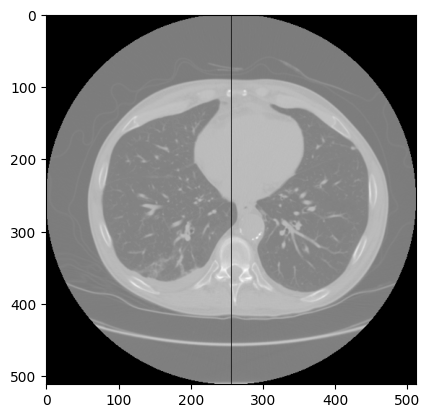

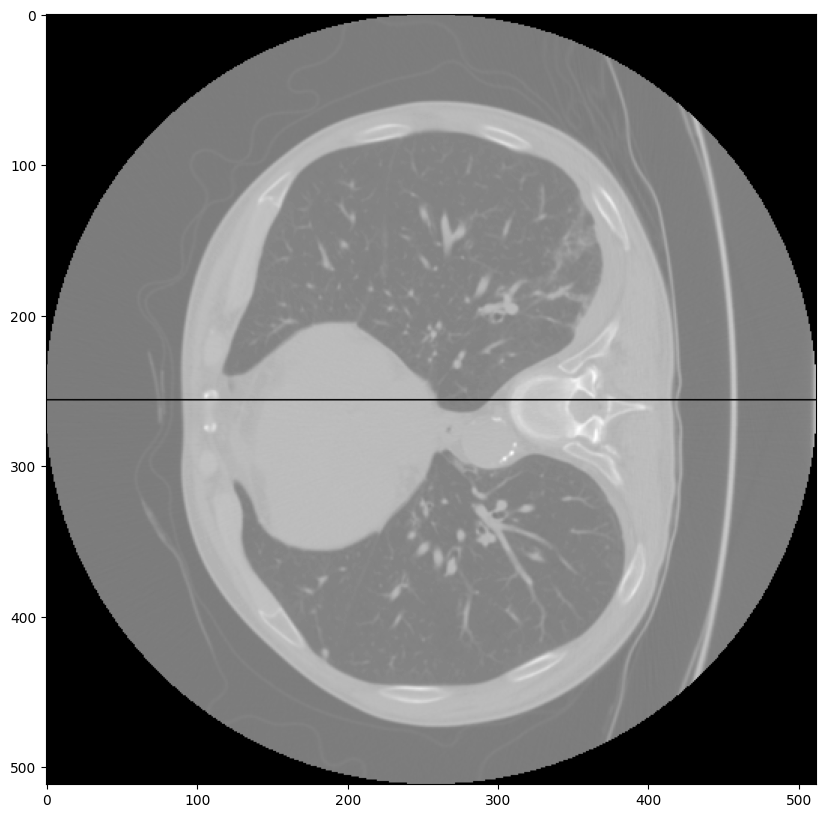

In [72]:
import SimpleITK as sitk
import nibabel as nib
import matplotlib.pyplot as plt

#image_array = sitk.GetArrayFromImage(img)
#print(image.shape)
#print(image_array.shape)

img = nib.load("/content/drive/MyDrive/medicalAI/CT_1.7.nii")
img2 = sitk.ReadImage("/content/drive/MyDrive/medicalAI/CT_1.7.nii")
print(img.shape)

img = img.get_fdata()#넘파이로 변환(헤더와 어레이 중에 어레이만 추출)

print("nibabel ver : ",img.shape) #nibabel로 했으니까 변함 없음

img2 = sitk.GetArrayFromImage(img2) #(헤더와 어레이 중에 어레이만 추출)
print("sitk ver : ",img2.shape) #sitk로 하면 반전됨
plt.imshow(img2[60,:,:],cmap='gray')
#[axial,coronal,sagittal]

plt.figure(figsize=(10,10))
plt.imshow(img[:,:,60], cmap='gray')
#[sagittal,coronal,axial]

# Task

In [82]:
#1. sitk를 사용해 CTChest.nii 데이터의 헤더 추출하기
import SimpleITK as sitk

img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/CTChest.nii")

print(img.GetSize())
print(img.GetDirection())
print(img.GetSpacing())
print(img.GetOrigin())


print("-----header information------")
inf = img.GetMetaDataKeys()
for a in inf:
  print(a , img.GetMetaData(a))

(512, 512, 139)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(0.7617189884185791, 0.7617189884185791, 2.5)
(-195.0, -171.6999969482422, -347.75)
-----header information------
ITK_FileNotes 
ITK_original_direction [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_sform_corrected NO
aux_file 
bitpix 32
cal_max 0
cal_min 0
datatype 8
descrip 
dim[0] 3
dim[1] 512
dim[2] 512
dim[3] 139
dim[4] 1
dim[5] 1
dim[6] 1
dim[7] 1
dim_info 0
intent_code 0
intent_name 
intent_p1 0
intent_p2 0
intent_p3 0
nifti_type 1
pixdim[0] 0
pixdim[1] 0.761719
pixdim[2] 0.761719
pixdim[3] 2.5
pixdim[4] 0
pixdim[5] 0
pixdim[6] 0
pixdim[7] 0
qfac [UNKNOWN_PRINT_CHARACTERISTICS]

qform_code 1
qform_code_name NIFTI_XFORM_SCANNER_ANAT
qoffset_x 195
qoffset_y 171.7
qoffset_z -347.75
qto_xyz [UNKNOWN_PRINT_CHARACTERISTICS]

quatern_b 0
quatern_c 0
quatern_d 1
scl_inter 0
scl_slope 1
sform_code 1
sform_code_name NIFTI_XFORM_SCANNER_ANAT
slice_code 0
slice_duration 0
slice_end 0
sl

(139, 512, 512)


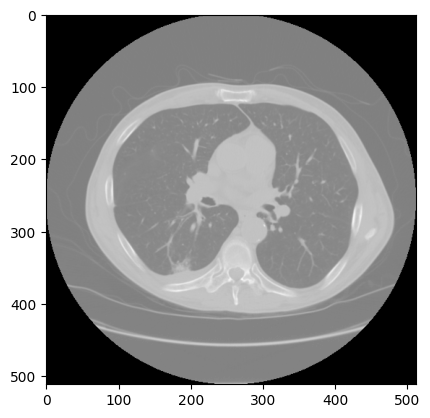

In [5]:
#2. 배열로 변환하고 어레이 정보 추출하기
import SimpleITK as sitk
import matplotlib.pyplot as plt

img = sitk.ReadImage('/content/drive/MyDrive/medicalAI/CTChest.nii')

img_array = sitk.GetArrayFromImage(img)
print(img_array.shape) #simpleITK니까 반전되어 나옴

plt.imshow(img_array[80,:,:],cmap='gray')

In [98]:
from myshow import myshow, myshow3d

img_range = sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8)

myshow3d(img)

ModuleNotFoundError: No module named 'myshow'